# Convergence of Monte-Carlo to estimate the probability in a reliability problem

The goal of this document is to present the convergence of the Monte-Carlo algorithm to the exact probability when the sample size increases. This convergence is expressed in terms of absolute error. We show that the rate of convergence is $O(\sqrt{n})$, where $n$ is the sample size.

In [1]:
import openturns as ot
import numpy as np
import otbenchmark as otb
import time

In [2]:
problem = otb.RminusSReliabilityBenchmarkProblem()
print(problem)

name = R-S
event = class=ThresholdEventImplementation antecedent=class=CompositeRandomVector function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[R,S,y0] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[R,S] outputVariablesNames=[y0] formulas=[R - S] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[R,S] outputVariablesNames=[y0] formulas=[R - S] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[R,S] outputVariablesNames=[y0] formulas=[R - S] antecedent=class=UsualRandomVector distribution=class=ComposedDistribution name=ComposedDistribution dimension=2 copula=class=IndependentCopula name=IndependentCopula dimension=2 marginal[0]=class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[4] sigma=class=Point name=Unna

In [3]:
def ComputeProbabilityFromMonteCarlo(
    problem, coefficientOfVariation=0.1, maximumOuterSampling=1000, blockSize=2
):
    event = problem.getEvent()
    g = event.getFunction()
    # Create the Monte-Carlo algorithm
    algoProb = ot.ProbabilitySimulationAlgorithm(event)
    algoProb.setMaximumOuterSampling(maximumOuterSampling)
    algoProb.setBlockSize(blockSize)
    algoProb.setMaximumCoefficientOfVariation(coefficientOfVariation)
    initialNumberOfFunctionEvaluations = g.getEvaluationCallsNumber()
    algoProb.run()
    # Get the results
    resultAlgo = algoProb.getResult()
    numberOfFunctionEvaluations = (
        g.getEvaluationCallsNumber() - initialNumberOfFunctionEvaluations
    )
    pf = resultAlgo.getProbabilityEstimate()
    level = 0.95
    c95 = resultAlgo.getConfidenceLength(level)
    pmin = pf - 0.5 * c95
    pmax = pf + 0.5 * c95
    print(
        "Number of function calls = %d" % (numberOfFunctionEvaluations),
        ", Pf = %.4f" % (pf),
        ", %.1f %% confidence interval :[%.4f,%.4f] " % (level * 100, pmin, pmax),
    )
    absoluteError = abs(pf - problem.getProbability())
    result = {
        "numberOfFunctionEvaluations": numberOfFunctionEvaluations,
        "pf": pf,
        "pmin": pmin,
        "pmax": pmax,
        "absoluteError": absoluteError,
    }
    return result

In [4]:
result = ComputeProbabilityFromMonteCarlo(problem)

Number of function calls = 1978 , Pf = 0.0713 , 95.0 % confidence interval :[0.0573,0.0852] 


In [5]:
numberOfPoints = 15  # Number of atomic experiments
numberOfRepetitions = 10  # Number of repetitions of each experiment
sampleSizeAbsoluteErrorTable = ot.Sample(numberOfPoints * numberOfRepetitions, 2)
sampleSizeAbsoluteErrorTable.setDescription(["Sample size", "Absolute error"])

In [6]:
cov = 0.0
startTime = time.time()

In [7]:
maximumOuterSampling = 1
index = 0
for i in range(numberOfPoints):
    maximumOuterSampling *= 2
    for j in range(numberOfRepetitions):
        result = ComputeProbabilityFromMonteCarlo(
            problem,
            coefficientOfVariation=cov,
            maximumOuterSampling=maximumOuterSampling,
        )
        sampleSizeAbsoluteErrorTable[index, 0] = result["numberOfFunctionEvaluations"]
        sampleSizeAbsoluteErrorTable[index, 1] = result["absoluteError"]
        index += 1

Number of function calls = 4 , Pf = 0.0000 , 95.0 % confidence interval :[0.0000,0.0000] 
Number of function calls = 4 , Pf = 0.0000 , 95.0 % confidence interval :[0.0000,0.0000] 
Number of function calls = 4 , Pf = 0.2500 , 95.0 % confidence interval :[-0.2978,0.7978] 
Number of function calls = 4 , Pf = 0.5000 , 95.0 % confidence interval :[0.0100,0.9900] 
Number of function calls = 4 , Pf = 0.0000 , 95.0 % confidence interval :[0.0000,0.0000] 
Number of function calls = 4 , Pf = 0.0000 , 95.0 % confidence interval :[0.0000,0.0000] 
Number of function calls = 4 , Pf = 0.0000 , 95.0 % confidence interval :[0.0000,0.0000] 
Number of function calls = 4 , Pf = 0.0000 , 95.0 % confidence interval :[0.0000,0.0000] 
Number of function calls = 4 , Pf = 0.0000 , 95.0 % confidence interval :[0.0000,0.0000] 
Number of function calls = 4 , Pf = 0.0000 , 95.0 % confidence interval :[0.0000,0.0000] 
Number of function calls = 8 , Pf = 0.0000 , 95.0 % confidence interval :[0.0000,0.0000] 
Number of

Number of function calls = 2048 , Pf = 0.0747 , 95.0 % confidence interval :[0.0609,0.0885] 
Number of function calls = 2048 , Pf = 0.0674 , 95.0 % confidence interval :[0.0542,0.0806] 
Number of function calls = 2048 , Pf = 0.0796 , 95.0 % confidence interval :[0.0653,0.0938] 
Number of function calls = 4096 , Pf = 0.0735 , 95.0 % confidence interval :[0.0637,0.0833] 
Number of function calls = 4096 , Pf = 0.0774 , 95.0 % confidence interval :[0.0674,0.0874] 
Number of function calls = 4096 , Pf = 0.0825 , 95.0 % confidence interval :[0.0722,0.0929] 
Number of function calls = 4096 , Pf = 0.0764 , 95.0 % confidence interval :[0.0665,0.0863] 
Number of function calls = 4096 , Pf = 0.0815 , 95.0 % confidence interval :[0.0713,0.0918] 
Number of function calls = 4096 , Pf = 0.0791 , 95.0 % confidence interval :[0.0689,0.0893] 
Number of function calls = 4096 , Pf = 0.0784 , 95.0 % confidence interval :[0.0682,0.0885] 
Number of function calls = 4096 , Pf = 0.0740 , 95.0 % confidence inte

In [8]:
elapsedTime = time.time() - startTime
print("Elapsed = %.2f (s)" % (elapsedTime))

Elapsed = 3.10 (s)


In [9]:
sampleSizeArray = [int(n) for n in np.logspace(0.0, 5.0)]
expectedConvergence = [1.0 / np.sqrt(n) for n in sampleSizeArray]

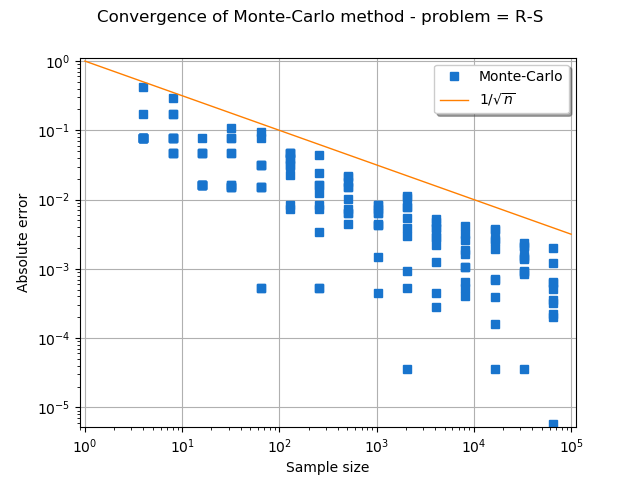

In [10]:
title = "Convergence of Monte-Carlo method - problem = %s" % (problem.getName())
graph = ot.Graph(title, "Sample size", "Absolute error", True, "topright")
curve = ot.Cloud(sampleSizeAbsoluteErrorTable, "blue", "fsquare", "")
curve.setLegend("Monte-Carlo")
graph.add(curve)
curve = ot.Curve(sampleSizeArray, expectedConvergence)
curve.setLegend(r"$1/\sqrt{n}$")
graph.add(curve)
graph.setLogScale(ot.GraphImplementation.LOGXY)
graph.setColors(["dodgerblue3", "darkorange1"])
graph